In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-23 17:30:47.606317: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-23 17:30:50.422101: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 17:30:50.424222: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-23 17:30:50.932348: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 17:30:50.935987: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13523, 512, 512, 1) (13523, 512, 512, 1) (3243, 512, 512, 1) (3243, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(567, 512, 512, 1) (567, 512, 512, 1) (147, 512, 512, 1) (147, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-23 17:33:25.133682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 17:33:25.136295: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 17:33:25.146264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-23 17:33:25.149346: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-23 17:33:25.151832: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-23 17:33:26.488279: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-23 17:33:26.508750: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-23 17:33:27.741607: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-23 17:33:28.548624: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-23 17:33:29.532856: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-23 17:33:29.532879: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-23 17:33:29.533255: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-23 17:33:30.578232: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-23 17:33:31.679524: I tensorflow/stream_exec

18/18 [==============================] - 168s 6s/step - loss: 1.6573 - iou: 1.1054e-04 - iou_thresholded: 6.4980e-04 - val_loss: 0.0477 - val_iou: 3.3658e-06 - val_iou_thresholded: 0.0010
Epoch 2/200
18/18 [==============================] - 18s 997ms/step - loss: 0.0113 - iou: 2.0750e-04 - iou_thresholded: 6.7809e-04 - val_loss: 0.0025 - val_iou: 5.3121e-04 - val_iou_thresholded: 0.0011
Epoch 3/200
18/18 [==============================] - 18s 990ms/step - loss: 0.0022 - iou: 3.8198e-04 - iou_thresholded: 7.3101e-04 - val_loss: 0.0019 - val_iou: 4.8573e-04 - val_iou_thresholded: 0.0011
Epoch 4/200
18/18 [==============================] - 18s 995ms/step - loss: 0.0018 - iou: 4.1477e-04 - iou_thresholded: 7.1571e-04 - val_loss: 0.0017 - val_iou: 5.5431e-04 - val_iou_thresholded: 0.0011
Epoch 5/200
18/18 [==============================] - 18s 992ms/step - loss: 0.0016 - iou: 5.6354e-04 - iou_thresholded: 7.2262e-04 - val_loss: 0.0015 - val_iou: 7.0674e-04 - val_iou_thresholded: 0.0011
Epoc

18/18 [==============================] - 18s 997ms/step - loss: 2.6086e-04 - iou: 0.4341 - iou_thresholded: 0.5623 - val_loss: 7.4487e-04 - val_iou: 0.2156 - val_iou_thresholded: 0.2388
Epoch 43/200
18/18 [==============================] - 18s 997ms/step - loss: 2.5533e-04 - iou: 0.4440 - iou_thresholded: 0.5630 - val_loss: 6.9706e-04 - val_iou: 0.2313 - val_iou_thresholded: 0.3212
Epoch 44/200
18/18 [==============================] - 18s 990ms/step - loss: 2.4937e-04 - iou: 0.4508 - iou_thresholded: 0.5824 - val_loss: 7.1549e-04 - val_iou: 0.2409 - val_iou_thresholded: 0.3089
Epoch 45/200
18/18 [==============================] - 18s 993ms/step - loss: 2.4504e-04 - iou: 0.4605 - iou_thresholded: 0.5855 - val_loss: 0.0010 - val_iou: 0.2004 - val_iou_thresholded: 0.2036
Epoch 46/200
18/18 [==============================] - 18s 993ms/step - loss: 2.5679e-04 - iou: 0.4528 - iou_thresholded: 0.5663 - val_loss: 7.8351e-04 - val_iou: 0.2577 - val_iou_thresholded: 0.2898
Epoch 47/200
18/18 [==

Epoch 84/200
18/18 [==============================] - 18s 994ms/step - loss: 2.3761e-04 - iou: 0.4933 - iou_thresholded: 0.6071 - val_loss: 0.0021 - val_iou: 0.1602 - val_iou_thresholded: 0.1605
Epoch 85/200
18/18 [==============================] - 18s 990ms/step - loss: 1.8946e-04 - iou: 0.5405 - iou_thresholded: 0.6465 - val_loss: 0.0016 - val_iou: 0.2141 - val_iou_thresholded: 0.2429
Epoch 86/200
18/18 [==============================] - 18s 993ms/step - loss: 1.6494e-04 - iou: 0.5760 - iou_thresholded: 0.6830 - val_loss: 0.0014 - val_iou: 0.2550 - val_iou_thresholded: 0.2944
Epoch 87/200
18/18 [==============================] - 18s 990ms/step - loss: 1.5562e-04 - iou: 0.5927 - iou_thresholded: 0.6957 - val_loss: 0.0015 - val_iou: 0.2302 - val_iou_thresholded: 0.2574
Epoch 88/200
18/18 [==============================] - 18s 992ms/step - loss: 1.4788e-04 - iou: 0.6089 - iou_thresholded: 0.7137 - val_loss: 0.0015 - val_iou: 0.2596 - val_iou_thresholded: 0.2803
Epoch 89/200
18/18 [=====

Epoch 126/200
18/18 [==============================] - 18s 992ms/step - loss: 1.0105e-04 - iou: 0.7068 - iou_thresholded: 0.7833 - val_loss: 0.0023 - val_iou: 0.2770 - val_iou_thresholded: 0.2943
Epoch 127/200
18/18 [==============================] - 18s 992ms/step - loss: 9.7239e-05 - iou: 0.7119 - iou_thresholded: 0.7894 - val_loss: 0.0019 - val_iou: 0.2990 - val_iou_thresholded: 0.3230
Epoch 128/200
18/18 [==============================] - 18s 990ms/step - loss: 9.7909e-05 - iou: 0.7136 - iou_thresholded: 0.7910 - val_loss: 0.0022 - val_iou: 0.2816 - val_iou_thresholded: 0.2960
Epoch 129/200
18/18 [==============================] - 18s 993ms/step - loss: 9.7871e-05 - iou: 0.7125 - iou_thresholded: 0.7930 - val_loss: 0.0023 - val_iou: 0.2697 - val_iou_thresholded: 0.2865
Epoch 130/200
18/18 [==============================] - 18s 992ms/step - loss: 9.5936e-05 - iou: 0.7169 - iou_thresholded: 0.7942 - val_loss: 0.0021 - val_iou: 0.2825 - val_iou_thresholded: 0.2978
Epoch 131/200
18/18 

Epoch 168/200
18/18 [==============================] - 18s 991ms/step - loss: 8.4056e-05 - iou: 0.7444 - iou_thresholded: 0.8143 - val_loss: 0.0020 - val_iou: 0.3106 - val_iou_thresholded: 0.3352
Epoch 169/200
18/18 [==============================] - 18s 990ms/step - loss: 8.3571e-05 - iou: 0.7452 - iou_thresholded: 0.8155 - val_loss: 0.0026 - val_iou: 0.2884 - val_iou_thresholded: 0.3043
Epoch 170/200
18/18 [==============================] - 18s 996ms/step - loss: 8.3005e-05 - iou: 0.7493 - iou_thresholded: 0.8172 - val_loss: 0.0024 - val_iou: 0.2899 - val_iou_thresholded: 0.3012
Epoch 171/200
18/18 [==============================] - 18s 990ms/step - loss: 8.2000e-05 - iou: 0.7480 - iou_thresholded: 0.8210 - val_loss: 0.0023 - val_iou: 0.2890 - val_iou_thresholded: 0.3012
Epoch 172/200
18/18 [==============================] - 18s 992ms/step - loss: 7.9444e-05 - iou: 0.7549 - iou_thresholded: 0.8199 - val_loss: 0.0024 - val_iou: 0.2818 - val_iou_thresholded: 0.2944
Epoch 173/200
18/18 

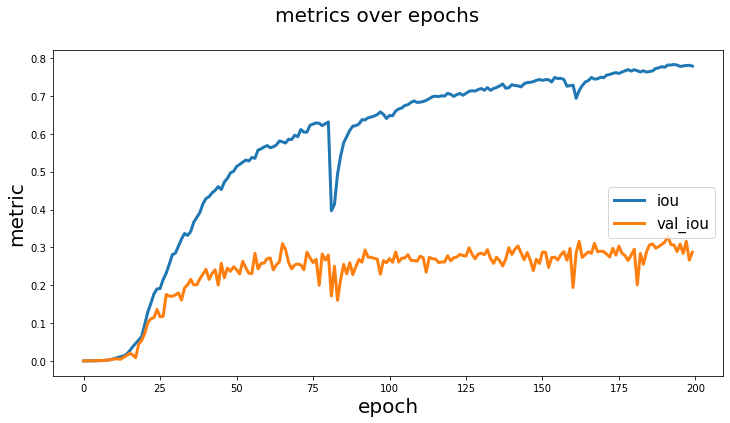

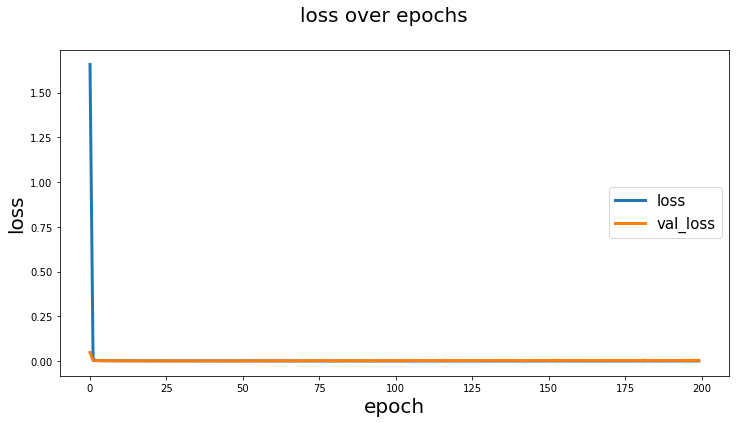

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

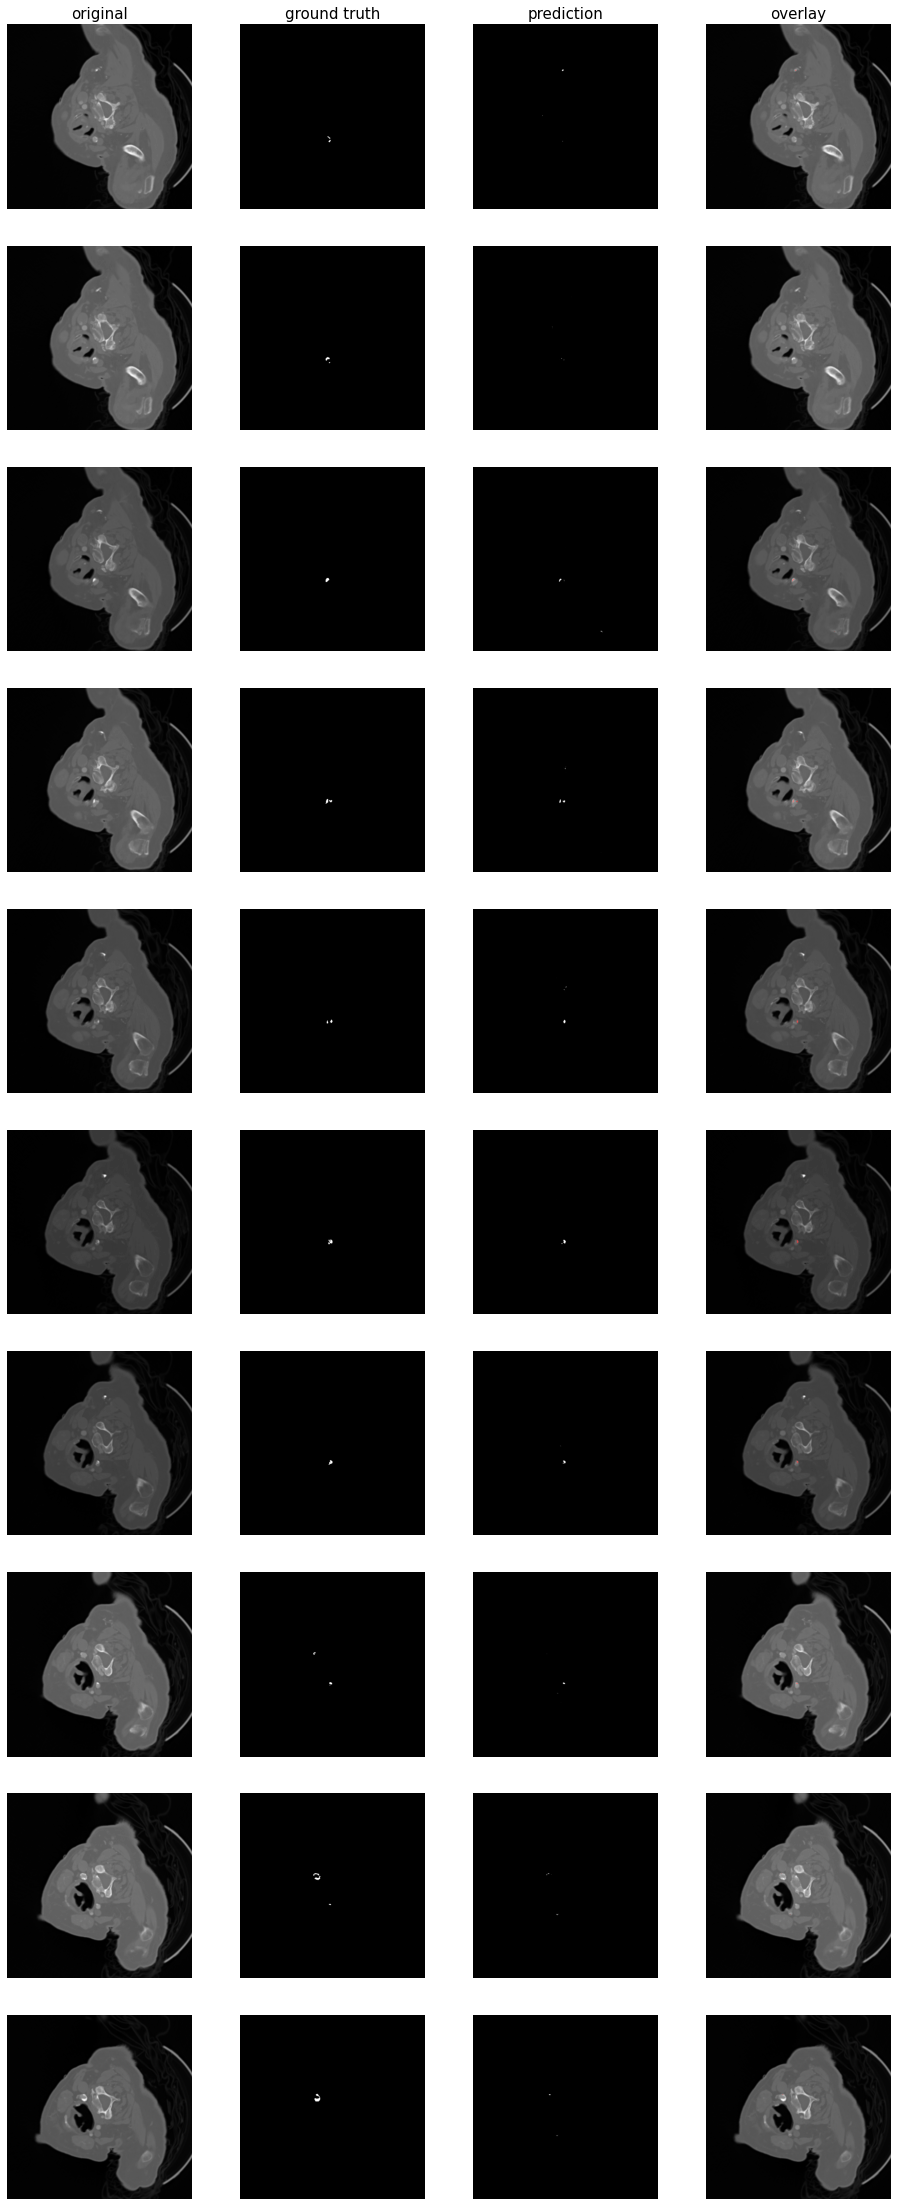

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

5/5 [==============================] - 1s 197ms/step - loss: 0.0031 - iou: 0.2872 - iou_thresholded: 0.2997
